In [ ]:
#G2M insight for Cab Investment firm

In [ ]:
#Importing Libraries

In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

In [ ]:
#Reading the Datasets

In [2]:
Cab_Data = pd.read_csv("C:/Users/BALAJI RAMYA/Desktop/DATA GLACIER VIRTUAL INTERNSHIP/WEEK 2/DataSets/Cab_Data.csv")
Customer_ID = pd.read_csv("C:/Users/BALAJI RAMYA/Desktop/DATA GLACIER VIRTUAL INTERNSHIP/WEEK 2/DataSets/Customer_ID.csv")
Transaction_ID = pd.read_csv("C:/Users/BALAJI RAMYA/Desktop/DATA GLACIER VIRTUAL INTERNSHIP/WEEK 2/DataSets/Transaction_ID.csv")
City = pd.read_csv("C:/Users/BALAJI RAMYA/Desktop/DATA GLACIER VIRTUAL INTERNSHIP/WEEK 2/DataSets/City.csv")

In [3]:
Cab_Data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
Cab_Data.tail()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480
359391,10440107,43102,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192


In [5]:
Transaction_ID.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [6]:
Transaction_ID.tail()

,Transaction ID,Customer ID,Payment_Mode
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card
440097,10440108,51587,Card


In [7]:
Customer_ID.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [8]:
Customer_ID.tail()

,Customer ID,Gender,Age,Income (USD/Month)
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454
49170,39761,Female,32,10128


In [9]:
City.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [10]:
City.tail()

,City,Population,Users
15,SACRAMENTO CA,"545,776","7,044"
16,PITTSBURGH PA,"542,085","3,643"
17,WASHINGTON DC,"418,859","127,001"
18,NASHVILLE TN,"327,225","9,270"
19,BOSTON MA,"248,968","80,021"


In [ ]:
#Checking the shape of four given datasets

In [11]:
print("Shape of Cab_Data", Cab_Data.shape)
print("Shape of Customer_ID", Customer_ID.shape)
print("Shape of Transaction_ID", Transaction_ID.shape)
print("Shape of City", City.shape)

Shape of Cab_Data (359392, 7)
Shape of Customer_ID (49171, 4)
Shape of Transaction_ID (440098, 3)
Shape of City (20, 3)


In [ ]:
#Checking the Baic Information of four given datasets

In [12]:
print(Cab_Data.info())
print(Customer_ID.info())
print(Transaction_ID.info())
print(City.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int6

In [ ]:
#Data Cleaning and Visualization

In [13]:
for col in Cab_Data.columns:
    if ' ' in col:
        Cab_Data = Cab_Data.rename(columns={col:col.replace(' ','_')})

In [14]:
Cab_Data.columns

Index(['Transaction_ID', 'Date_of_Travel', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip'],
      dtype='object')

In [15]:
for col in Customer_ID.columns:
    if ' ' in col:
        Customer_ID = Customer_ID.rename(columns={col:col.replace(' ','_')})

In [16]:
Customer_ID.columns

Index(['Customer_ID', 'Gender', 'Age', 'Income_(USD/Month)'], dtype='object')

In [17]:
for col in Transaction_ID.columns:
    if ' ' in col:
        Transaction_ID = Transaction_ID.rename(columns={col:col.replace(' ','_')})

In [18]:
Transaction_ID.columns

Index(['Transaction_ID', 'Customer_ID', 'Payment_Mode'], dtype='object')

In [19]:
Cab_Data.head(4)

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602


In [20]:
from datetime import datetime, timedelta
def to_date_format(n):
    date_str =(datetime(1899,12,30) + timedelta(n-1)).strftime("%d-%m-%Y")
    date_date =  datetime.strptime(date_str, "%d-%m-%Y")
    return date_date

In [21]:
Cab_Data['Date_of_Travel'] = Cab_Data['Date_of_Travel'].apply(lambda x:to_date_format(x))

In [22]:
Cab_Data.head(4)

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602


In [ ]:
months=[]
years =[]
for i in range(len(Cab_Data['Date_of_Travel'])):
    months.append(Cab_Data['Date_of_Travel'][i].month)
    years.append(Cab_Data['Date_of_Travel'][i].year)
Cab_Data['Month'] = months
Cab_Data['Year'] = years

Cab_Data.drop('Date_of_Travel', axis=1, inplace=True)

In [ ]:
#Checking the attributes of four given datasets

In [23]:
Cab_Data.dtypes

Transaction_ID             int64
Date_of_Travel    datetime64[ns]
Company                   object
City                      object
KM_Travelled             float64
Price_Charged            float64
Cost_of_Trip             float64
dtype: object

In [24]:
Customer_ID.dtypes

Customer_ID            int64
Gender                object
Age                    int64
Income_(USD/Month)     int64
dtype: object

In [25]:
Transaction_ID.dtypes

Transaction_ID     int64
Customer_ID        int64
Payment_Mode      object
dtype: object

In [26]:
City.dtypes

City          object
Population    object
Users         object
dtype: object

In [27]:
Cab_Data.describe(include='all')

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip
count,3.593920e+05,359392,359392,359392,359392.000000,359392.000000,359392.000000
unique,NaN,1095,2,19,NaN,NaN,NaN
top,NaN,2018-01-04 00:00:00,Yellow Cab,NEW YORK NY,NaN,NaN,NaN
freq,NaN,2022,274681,99885,NaN,NaN,NaN
first,NaN,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,2018-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,1.022076e+07,NaN,NaN,NaN,22.567254,423.443311,286.190113
std,1.268058e+05,NaN,NaN,NaN,12.233526,274.378911,157.993661
min,1.000001e+07,NaN,NaN,NaN,1.900000,15.600000,19.000000
25%,1.011081e+07,NaN,NaN,NaN,12.000000,206.437500,151.200000


In [ ]:
#Sorting the Cab_Data Dataset by 'Date of Travel'

In [141]:
Cab_Data = Cab_Data.sort_values(by=['Date_of_Travel'])
Cab_Data = Cab_Data.sort_index(drop= True)

TypeError: sort_index() got an unexpected keyword argument 'drop'

In [29]:
Cab_Data.head(10)

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776
5,10000016,2016-01-06,Pink Cab,ATLANTA GA,6.06,72.43,63.024
6,10000017,2016-01-02,Pink Cab,AUSTIN TX,44.00,576.15,475.200
7,10000018,2016-01-06,Pink Cab,AUSTIN TX,35.65,466.10,377.890
8,10000019,2016-01-11,Pink Cab,BOSTON MA,14.40,191.61,146.880
9,10000020,2016-01-05,Pink Cab,BOSTON MA,10.89,156.98,113.256


In [38]:
x = Cab_Data['Date of Travel'].to_list()
base_date = pd.Timestamp('1899-12-29')
dates = [base_date + pd.DateOffset(date_offset) for date_offset in x]

KeyError: 'Date of Travel'

In [35]:
Cab_Data['Date of Travel'] = pd.to_datetime(dates, format='%y/%m/%d')

NameError: name 'dates' is not defined

In [43]:
master_data = Cab_Data.merge(Transaction_ID, on= 'Transaction_ID').merge(Customer_ID, on ='Customer_ID').merge(City, on = 'City')


In [44]:
master_data.head(3)

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"


In [45]:
master_data.shape

(359392, 14)

In [46]:
master_data.dtypes

Transaction_ID                 int64
Date_of_Travel        datetime64[ns]
Company                       object
City                          object
KM_Travelled                 float64
Price_Charged                float64
Cost_of_Trip                 float64
Customer_ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income_(USD/Month)             int64
Population                    object
Users                         object
dtype: object

In [47]:
master_data.describe(include='all')

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users
count,3.593920e+05,359392,359392,359392,359392.000000,359392.000000,359392.000000,359392.000000,359392,359392,359392.000000,359392.000000,359392,359392
unique,NaN,1095,2,19,NaN,NaN,NaN,NaN,2,2,NaN,NaN,19,19
top,NaN,2018-01-04 00:00:00,Yellow Cab,NEW YORK NY,NaN,NaN,NaN,NaN,Card,Male,NaN,NaN,"8,405,837","302,149"
freq,NaN,2022,274681,99885,NaN,NaN,NaN,NaN,215504,205912,NaN,NaN,99885,99885
first,NaN,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2018-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.022076e+07,NaN,NaN,NaN,22.567254,423.443311,286.190113,19191.652115,NaN,NaN,35.336705,15048.822937,NaN,NaN
std,1.268058e+05,NaN,NaN,NaN,12.233526,274.378911,157.993661,21012.412463,NaN,NaN,12.594234,7969.409482,NaN,NaN
min,1.000001e+07,NaN,NaN,NaN,1.900000,15.600000,19.000000,1.000000,NaN,NaN,18.000000,2000.000000,NaN,NaN
25%,1.011081e+07,NaN,NaN,NaN,12.000000,206.437500,151.200000,2705.000000,NaN,NaN,25.000000,8424.000000,NaN,NaN


In [48]:
master_data.isnull().sum() 

Transaction_ID        0
Date_of_Travel        0
Company               0
City                  0
KM_Travelled          0
Price_Charged         0
Cost_of_Trip          0
Customer_ID           0
Payment_Mode          0
Gender                0
Age                   0
Income_(USD/Month)    0
Population            0
Users                 0
dtype: int64

In [ ]:
#There are No Missing Values

In [ ]:
#Checking Duplicates

In [49]:
duplicated_rows = master_data[master_data.duplicated()]
print('Total number of duplicated rows is', duplicated_rows.shape[0])

Total number of duplicated rows is 0


In [ ]:
#Outlier Detection

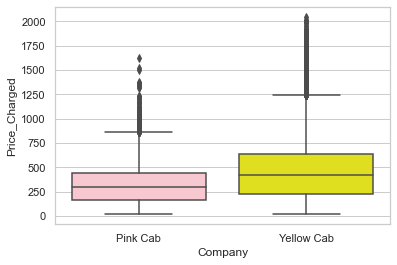

In [53]:
# Setting a White background (use sns.set_theme() if seaborn version 0.11.0 or above)
sns.set(style="whitegrid")

# Specifying a color for each distribution
my_dist = {"Pink Cab": "pink", "Yellow Cab": "yellow"}

# usual boxplot, plotted on a matplotlib.axes object named ax
ax = sns.boxplot(x="Company", 
                 y="Price_Charged", 
                 data=master_data,
                 order=["Pink Cab", "Yellow Cab"], 
                 palette= my_dist)

In [ ]:
# The price charge range for Yellow cab is more than the Pink cab.

In [ ]:
# Outliers are present in the Price Charged feature

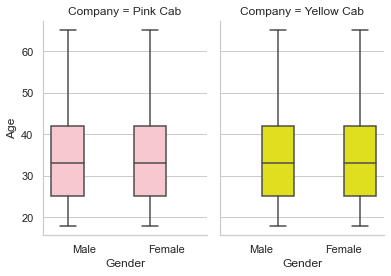

In [54]:
# setting a White background (use sns.set_theme() if seaborn version 0.11.0 or above)
sns.set(style="whitegrid")

# Specifying a color for each distribution
my_dist = {"Pink Cab": "pink", "Yellow Cab": "yellow"}

ax = sns.catplot(x="Gender", 
            y="Age",
            hue="Company", 
            col="Company",
            data=master_data, 
            kind="box",
            height=4, 
            aspect=.7, palette= my_dist)

In [ ]:
#Correlations

In [55]:
master_data.corr()

,Transaction_ID,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Age,Income_(USD/Month)
Transaction_ID,1.000000,-0.001429,-0.052902,-0.003462,-0.016912,-0.001267,-0.001570
KM_Travelled,-0.001429,1.000000,0.835753,0.981848,0.000389,-0.000369,-0.000544
Price_Charged,-0.052902,0.835753,1.000000,0.859812,-0.177324,-0.003084,0.003228
Cost_of_Trip,-0.003462,0.981848,0.859812,1.000000,0.003077,-0.000189,-0.000633
Customer_ID,-0.016912,0.000389,-0.177324,0.003077,1.000000,-0.004735,-0.013608
Age,-0.001267,-0.000369,-0.003084,-0.000189,-0.004735,1.000000,0.003907
Income_(USD/Month),-0.001570,-0.000544,0.003228,-0.000633,-0.013608,0.003907,1.000000


<AxesSubplot:>

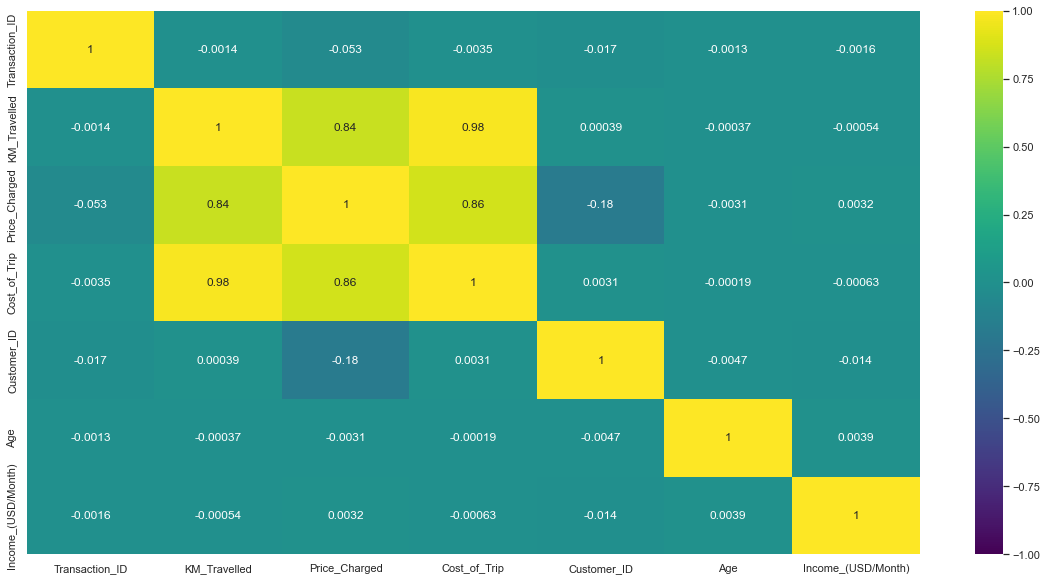

In [56]:
plt.figure(figsize=(20,10))
sns.heatmap(master_data.corr(),
            annot=True,
            vmin=-1,
            vmax=1,
            cmap="viridis")

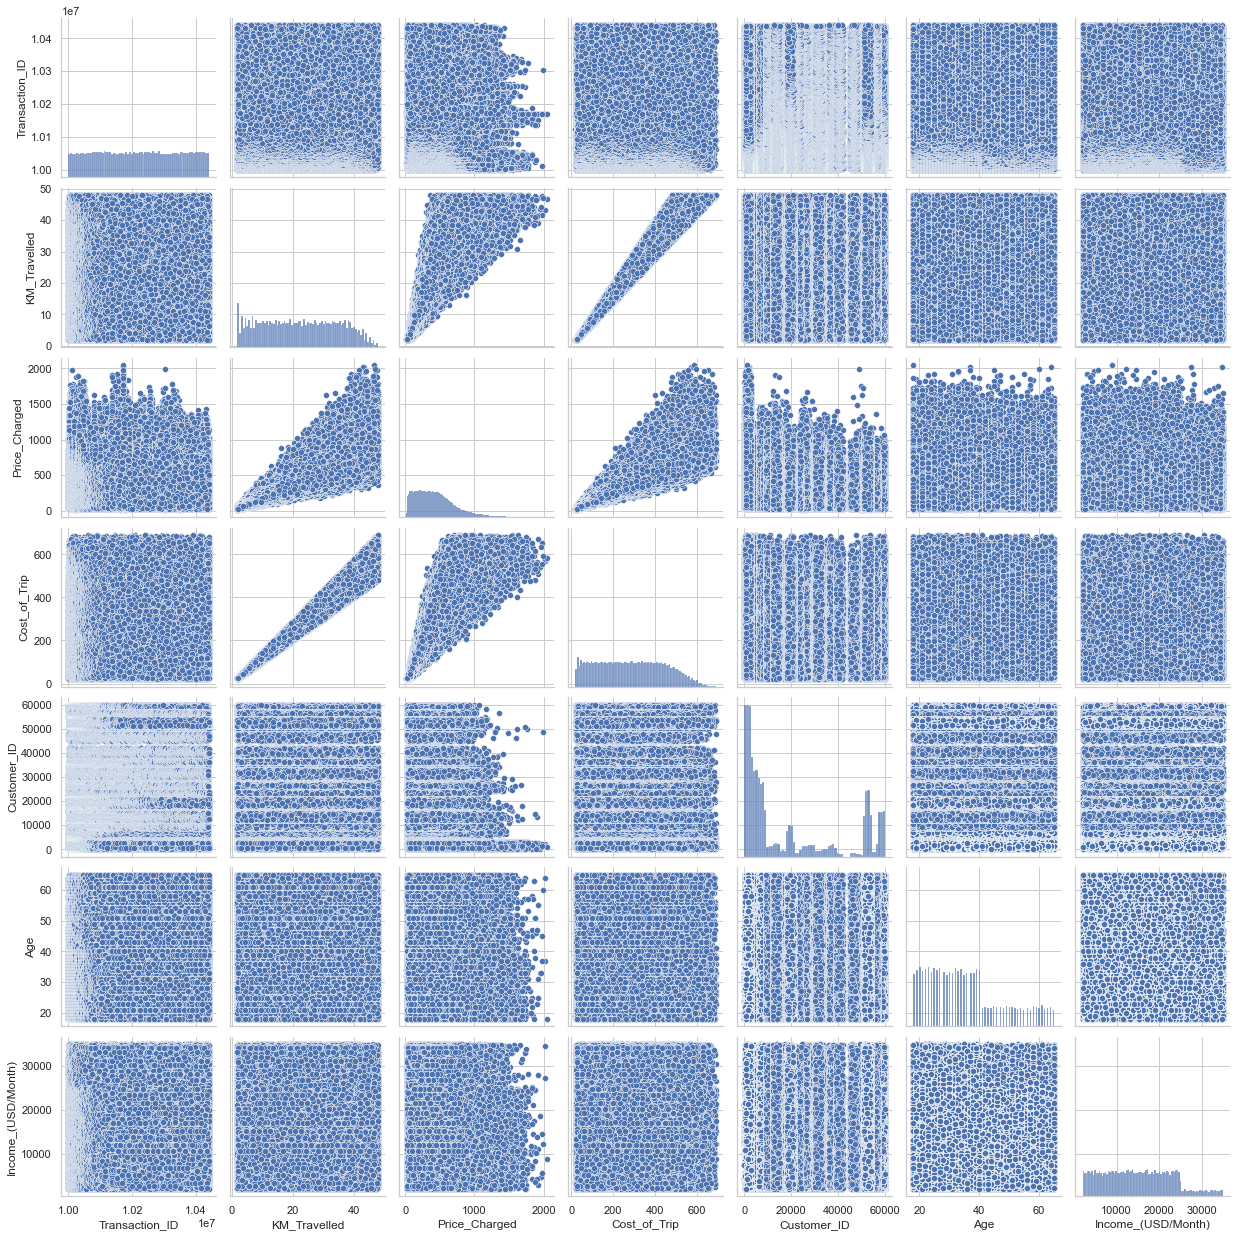

In [57]:
sns.pairplot(master_data)
plt.show()

Text(0.5, 0, 'Km_Travelled')

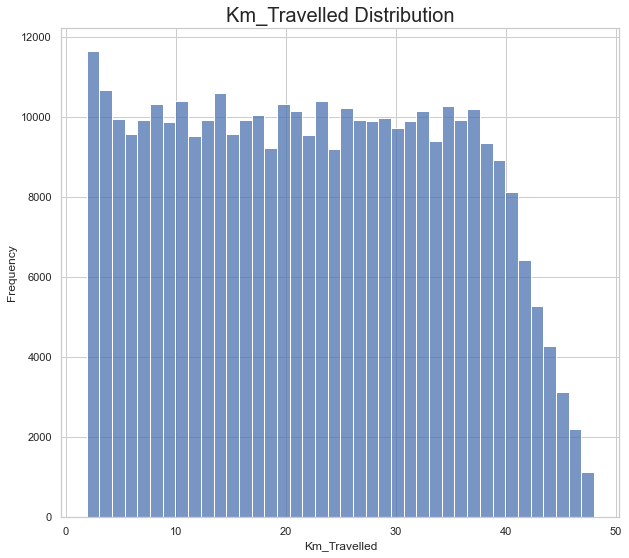

In [60]:
plt.figure(figsize=(10,9))
ax=sns.histplot(data=master_data, x="KM_Travelled",bins=40, color= 'b')
plt.title('Km_Travelled Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Km_Travelled')

In [ ]:
#Most of the trips differs from 2 to 48 KM.

In [61]:
Pink = master_data[master_data['Company']=='Pink Cab']
Yellow = master_data[master_data['Company']=='Yellow Cab']

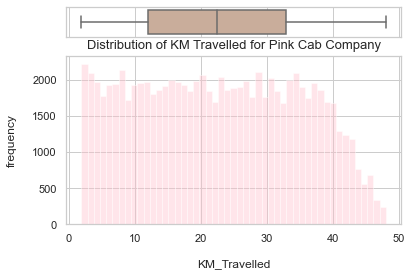

In [62]:
# Setting a White background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="whitegrid")
 
# Creating a figure composed of two matplotlib.Axes objects (ax_box and ax_dist)
f, (ax_box, ax_dist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Assigning a graph to each ax
sns.boxplot(Pink['KM_Travelled'], palette= 'pink', ax=ax_box)
# sns.histplot(data=Pink, x="KM Travelled", ax=ax_hist)
sns.distplot(Pink['KM_Travelled'], kde=False, color='pink', ax=ax_dist)

# Remove x axis name for the boxplot
ax_box.set(xlabel='')

# setting title and labels
plt.title("Distribution of KM Travelled for Pink Cab Company", fontsize=13, y=1.012)
plt.xlabel("KM_Travelled", labelpad=15)
plt.ylabel("frequency", labelpad=15)
plt.show()

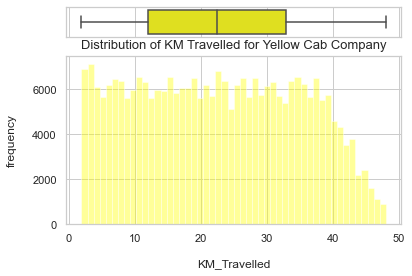

In [63]:
# Setting a White background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="whitegrid")
 
# Creating a figure composed of two matplotlib.Axes objects (ax_box and ax_dist)
f, (ax_box, ax_dist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Assigning a graph to each ax
sns.boxplot(Yellow['KM_Travelled'], color= 'yellow', ax=ax_box)
# sns.histplot(data=Pink, x="KM Travelled", ax=ax_hist)
sns.distplot(Yellow['KM_Travelled'], kde=False, color='yellow', ax=ax_dist)

# Remove x axis name for the boxplot
ax_box.set(xlabel='')

# setting title and labels
plt.title("Distribution of KM Travelled for Yellow Cab Company", fontsize=13, y=1.012)
plt.xlabel("KM_Travelled", labelpad=15)
plt.ylabel("frequency", labelpad=15)
plt.show()

In [ ]:
#Price Charged:

Text(0.5, 0, 'Price_Charged')

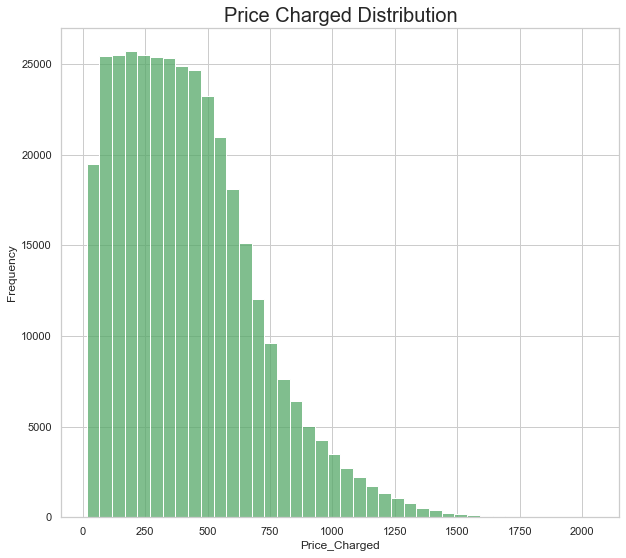

In [64]:
plt.figure(figsize=(10,9))
sns.histplot(data=master_data, x="Price_Charged",bins=40 , color= 'g')
plt.title('Price Charged Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Price_Charged')

In [65]:
p = [master_data['Price_Charged'].min(), master_data['Price_Charged'].max()]
print("The price charged for all trips ranges between :", p[0],'$','and',p[1], '$')

The price charged for all trips ranges between : 15.6 $ and 2048.03 $


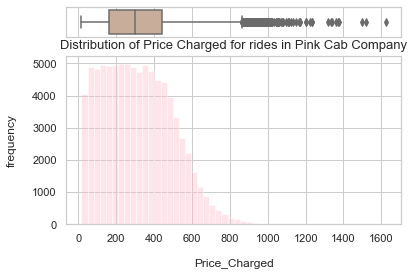

In [66]:
# Setting a white background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="whitegrid")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_dist)
f, (ax_box, ax_dist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(Pink['Price_Charged'], palette= 'pink', ax=ax_box)
# sns.histplot(data=Pink, x="KM Travelled", ax=ax_hist)
sns.distplot(Pink['Price_Charged'], kde=False, color='pink', ax=ax_dist)

# Remove x axis name for the boxplot
ax_box.set(xlabel='')

# setting title and labels
plt.title("Distribution of Price Charged for rides in Pink Cab Company", fontsize=13, y=1.012)
plt.xlabel("Price_Charged", labelpad=15)
plt.ylabel("frequency", labelpad=15)
plt.show()

In [67]:
p = [Pink['Price_Charged'].unique().min(), Pink['Price_Charged'].unique().max()]
print("The price charged for Pink cab company ranges between :", p[0],'$','and',p[1], '$')

The price charged for Pink cab company ranges between : 15.6 $ and 1623.48 $


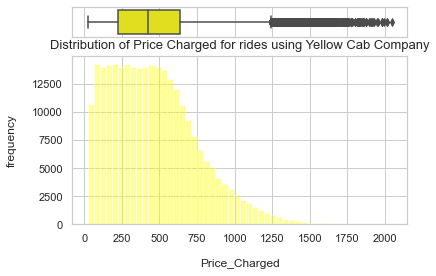

In [68]:
# Setting a White background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="whitegrid")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_dist)
f, (ax_box, ax_dist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(Yellow['Price_Charged'], color= 'yellow', ax=ax_box)
# sns.histplot(data=Pink, x="KM Travelled", ax=ax_hist)
sns.distplot(Yellow['Price_Charged'], kde=False, color='yellow', ax=ax_dist)

# Remove x axis name for the boxplot
ax_box.set(xlabel='')

# setting title and labels
plt.title("Distribution of Price Charged for rides using Yellow Cab Company", fontsize=13, y=1.012)
plt.xlabel("Price_Charged", labelpad=15)
plt.ylabel("frequency", labelpad=15)
plt.show()

In [69]:
y = [Yellow['Price_Charged'].unique().min(), Yellow['Price_Charged'].unique().max()]
print("The price charged for Yellow cab company ranges between :", y[0],'$','and',y[1], '$')

The price charged for Yellow cab company ranges between : 20.73 $ and 2048.03 $


In [ ]:
#The price charged range for Yellow cab company is higher than the Pink cab company.

In [ ]:
#Cost of Trip:

Text(0.5, 0, 'Cost_of_Trip')

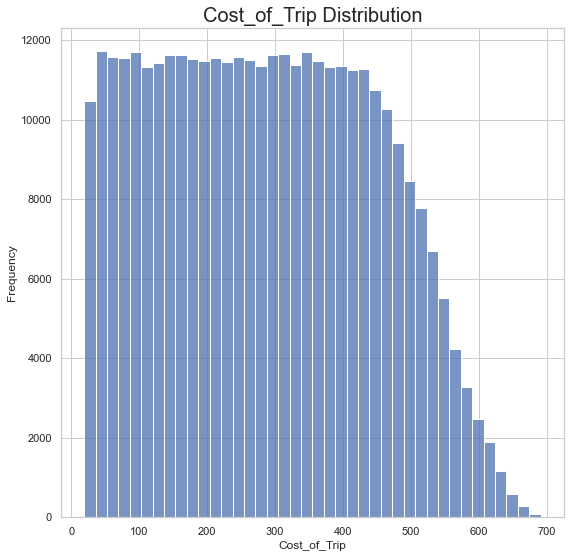

In [70]:
plt.figure(figsize=(9,9))
sns.histplot(data=master_data, x="Cost_of_Trip",bins=40 , color= 'b')
plt.title('Cost_of_Trip Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Cost_of_Trip')

In [71]:
c = [master_data['Cost_of_Trip'].unique().min(), master_data['Cost_of_Trip'].unique().max()]
print("The cost of trips ranges between :", c[0],'$','and',c[1], '$')

The cost of trips ranges between : 19.0 $ and 691.2 $


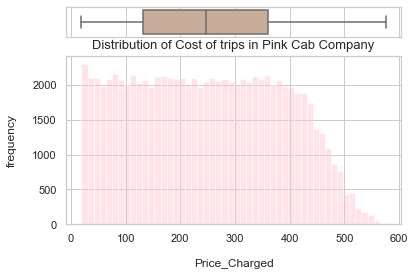

In [72]:
# Setting a White background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="whitegrid")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_dist)
f, (ax_box, ax_dist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(Pink['Cost_of_Trip'], palette= 'pink', ax=ax_box)
# sns.histplot(data=Pink, x="KM Travelled", ax=ax_hist)
sns.distplot(Pink['Cost_of_Trip'], kde=False, color='pink', ax=ax_dist)

# Remove x axis name for the boxplot
ax_box.set(xlabel='')

# setting title and labels
plt.title("Distribution of Cost of trips in Pink Cab Company", fontsize=13, y=1.012)
plt.xlabel("Price_Charged", labelpad=15)
plt.ylabel("frequency", labelpad=15)
plt.show()

In [73]:
pc = [Pink['Cost_of_Trip'].unique().min(), Pink['Cost_of_Trip'].unique().max()]
print("The cost for Pink cab company ranges between :", pc[0],'$','and',pc[1], '$')

The cost for Pink cab company ranges between : 19.0 $ and 576.0 $


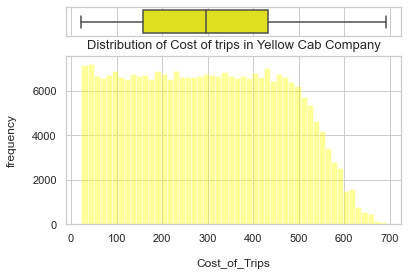

In [74]:
# Setting a White background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="whitegrid")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_dist)
f, (ax_box, ax_dist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(Yellow['Cost_of_Trip'], color= 'yellow', ax=ax_box)
# sns.histplot(data=Pink, x="KM Travelled", ax=ax_hist)
sns.distplot(Yellow['Cost_of_Trip'], kde=False, color='yellow', ax=ax_dist)

# Remove x axis name for the boxplot
ax_box.set(xlabel='')

# setting title and labels
plt.title("Distribution of Cost of trips in Yellow Cab Company", fontsize=13, y=1.012)
plt.xlabel("Cost_of_Trips", labelpad=15)
plt.ylabel("frequency", labelpad=15)
plt.show()

In [75]:
yc = [Yellow['Cost_of_Trip'].unique().min(), Yellow['Cost_of_Trip'].unique().max()]
print("The cost for Yellow cab company ranges between :", yc[0],'$','and',yc[1], '$')

The cost for Yellow cab company ranges between : 22.8 $ and 691.2 $


In [ ]:
# The Cost of Trip range for Yellow cab company is higher than the Pink cab company (expected since the price charged is also higher)

In [ ]:
# Payment Mode:

Text(0.5, 0, 'Payment_Mode')

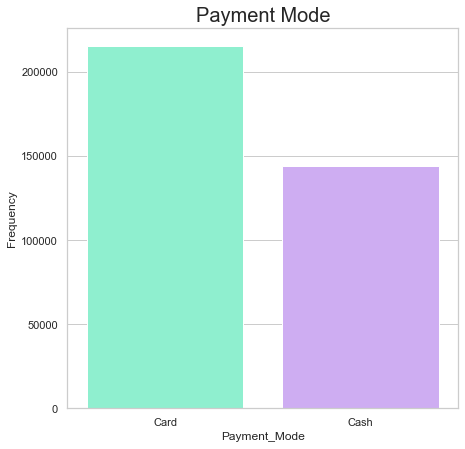

In [76]:
plt.figure(figsize=(7,7))
sns.countplot(data=master_data, x="Payment_Mode", palette=['#7FFFD4',"#cea2fd"])
plt.title('Payment Mode', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Payment_Mode')

Text(0.5, 1.0, 'Payment Mode in both companies')

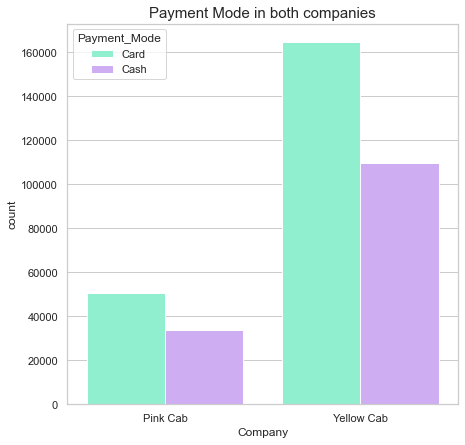

In [77]:
plt.figure(figsize=(7,7))
ax = sns.countplot(x="Company", hue="Payment_Mode", data=master_data, palette=['#7FFFD4',"#cea2fd"])
plt.title('Payment Mode in both companies', fontsize=15)

In [ ]:
#Cab Users prefer to pay with card than cash

In [ ]:
Gender:

Text(0.5, 0, 'sex')

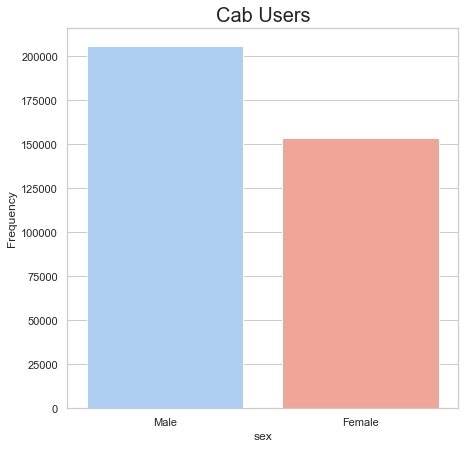

In [78]:
plt.figure(figsize=(7,7))
sns.countplot(data=master_data, x="Gender", palette=['#a2cffe',"#ff9a8a"])
plt.title('Cab Users', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('sex')

Text(0.5, 1.0, 'Cab users in both companies')

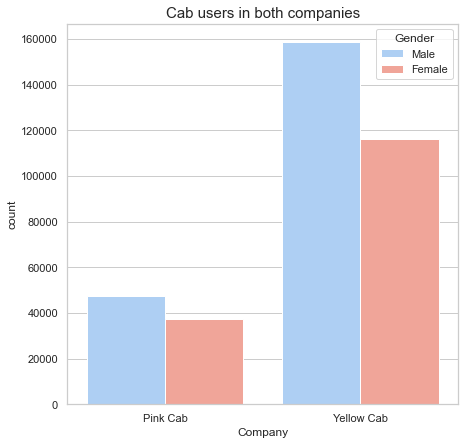

In [79]:
plt.figure(figsize=(7,7))
ax = sns.countplot(x="Company", hue="Gender", data=master_data, palette=['#a2cffe',"#ff9a8a"])
plt.title('Cab users in both companies', fontsize=15)

In [ ]:
#Most of the Females prefer to taking a Yellow Cab

In [ ]:
#Time series Dataset:
#Step 1: Let's split the attribute 'Date of Travel' into years, months and days

In [80]:
master_data['Year'] = master_data['Date_of_Travel'].dt.year
master_data['Month'] = master_data['Date_of_Travel'].dt.month
master_data['Day'] = master_data['Date_of_Travel'].dt.day

In [81]:
master_data.dtypes

Transaction_ID                 int64
Date_of_Travel        datetime64[ns]
Company                       object
City                          object
KM_Travelled                 float64
Price_Charged                float64
Cost_of_Trip                 float64
Customer_ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income_(USD/Month)             int64
Population                    object
Users                         object
Year                           int64
Month                          int64
Day                            int64
dtype: object

In [82]:
master_data_TS=master_data.set_index('Date_of_Travel')

In [83]:
master_data_TS.head(3)

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users,Year,Month,Day
Date_of_Travel,,,,,,,,,,,,,,,,
2016-01-07,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701",2016,1,7
2018-07-20,10351127,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701",2018,7,20
2018-11-22,10412921,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701",2018,11,22


In [84]:
master_data_TS.sort_values('Date_of_Travel').head(3)

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users,Year,Month,Day
Date_of_Travel,,,,,,,,,,,,,,,,
2016-01-01,10000429,Yellow Cab,BOSTON MA,15.15,342.62,205.4340,57474,Card,Male,34,16558,"248,968","80,021",2016,1,1
2016-01-01,10000525,Yellow Cab,CHICAGO IL,2.18,51.47,26.4216,4551,Cash,Male,19,6316,"1,955,130","164,468",2016,1,1
2016-01-01,10001234,Yellow Cab,SEATTLE WA,39.60,1119.67,541.7280,38146,Cash,Male,36,6577,"671,238","25,063",2016,1,1


In [ ]:
# Step 2: Let's rename some columns

In [85]:
for col in master_data_TS.columns:
    if ' ' in col:
        master_data_TS = master_data_TS.rename(columns={col:col.replace(' ','_')})

In [86]:
master_data_TS.columns

Index(['Transaction_ID', 'Company', 'City', 'KM_Travelled', 'Price_Charged',
       'Cost_of_Trip', 'Customer_ID', 'Payment_Mode', 'Gender', 'Age',
       'Income_(USD/Month)', 'Population', 'Users', 'Year', 'Month', 'Day'],
      dtype='object')

In [ ]:
# Step 3: Let's split the dataset for each company

In [87]:
PinkCab_data = master_data_TS[master_data_TS['Company']=='Pink Cab']
YellowCab_data = master_data_TS[master_data_TS['Company']=='Yellow Cab']

In [88]:
PinkCab_data.shape, YellowCab_data.shape

((84711, 16), (274681, 16))

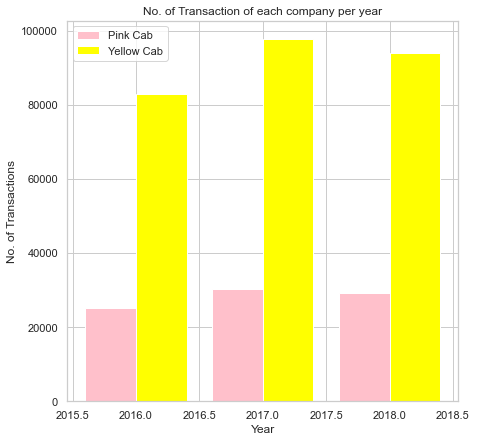

In [89]:
plot1 = PinkCab_data.groupby('Year').Transaction_ID.count()
plot2 = YellowCab_data.groupby('Year').Transaction_ID.count()
plt.figure(figsize=(7,7))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot1.values, width=0.4, color='pink', align='center',label='Pink Cab')
ax.bar(plot2.index+0.2, plot2.values, width=0.4, color='yellow', align='center',label='Yellow Cab')
plt.title('No. of Transaction of each company per year')
plt.ylabel('No. of Transactions')
plt.xlabel('Year')
plt.legend()
plt.show()

In [ ]:
# The Yellow Cab company looks more active than the Pink Cab company.

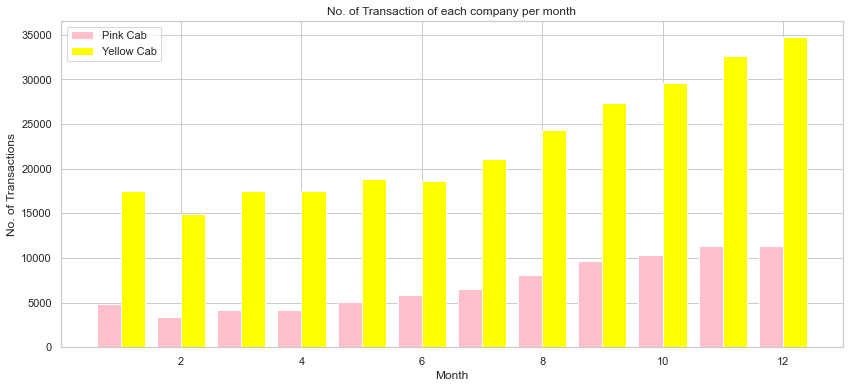

In [90]:
plot1 = PinkCab_data.groupby('Month').Transaction_ID.count()
plot2 = YellowCab_data.groupby('Month').Transaction_ID.count()
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot1.values, width=0.4, color='pink', align='center',label='Pink Cab')
ax.bar(plot1.index+0.2, plot2.values, width=0.4, color='yellow', align='center',label='Yellow Cab')
plt.title('No. of Transaction of each company per month')
plt.ylabel('No. of Transactions')
plt.xlabel('Month')
plt.legend()
plt.show()

In [ ]:
# As we can see from this bar plot, Yellow Cab company is in high demand than the pink cab company especially during Holiday season.

In [ ]:
# Profit Analysis:

#Let's add a new column to our dataset where we calculate the margin between 'Price_Charged' and 'Cost_of_Trip' and call it 'Profit'.


In [97]:
master_data_TS['Profit'] = master_data_TS['Price_Charged'] - master_data_TS['Cost_of_Trip']

In [98]:
master_data_TS.head()

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users,Year,Month,Day,Profit
Date_of_Travel,,,,,,,,,,,,,,,,,
2016-01-07,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701",2016,1,7,57.3150
2018-07-20,10351127,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701",2018,7,20,281.2772
2018-11-22,10412921,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701",2018,11,22,194.6480
2016-01-05,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701",2016,1,5,23.6660
2018-04-20,10320494,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701",2018,4,20,253.9808


In [99]:
a = master_data_TS.groupby(['Company', 'Year']).Profit.sum().to_frame('Profit')

In [100]:
b = master_data_TS.groupby(['Company', 'Year'])['Price_Charged'].sum().to_frame('Price')

In [102]:
b['%Profit'] =(a['Profit']*100) /b['Price']

Text(0.5, 1.0, 'Profit % per year')

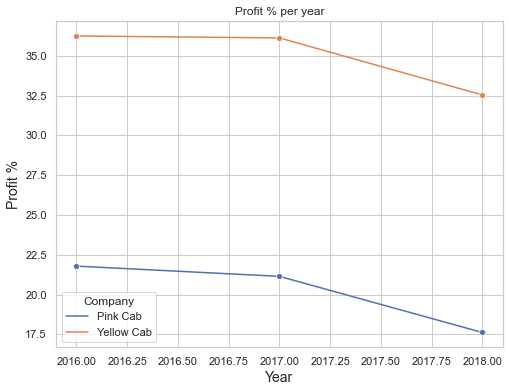

In [103]:
plt.figure(figsize=(8,6))
sns.lineplot(x='Year', y='%Profit', hue="Company", data=b, marker='o')
plt.xlabel("Year", size=14)
plt.ylabel("Profit %", size=14)
plt.title("Profit % per year")

Text(0.5, 1.0, 'Prices per year')

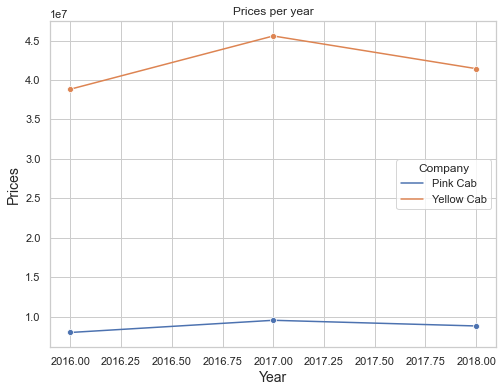

In [104]:
plt.figure(figsize=(8,6))
sns.lineplot(x='Year', y='Price', hue="Company", data=b, marker='o')
plt.xlabel("Year", size=14)
plt.ylabel("Prices", size=14)
plt.title('Prices per year')

In [105]:
PinkCab_data['Profit'] = PinkCab_data['Price_Charged'] - PinkCab_data['Cost_of_Trip']
YellowCab_data['Profit'] = YellowCab_data['Price_Charged'] - YellowCab_data['Cost_of_Trip']

In [106]:
round(master_data_TS.groupby(['Company']).Profit.sum().to_frame('Total Profit'),0)

,Total Profit
Company,
Pink Cab,5307328.0
Yellow Cab,44020373.0


In [ ]:
# YellowCab's profits over the last 3 years are eight times higher than PinkCab's Company

In [107]:
c = master_data_TS.groupby(['Company', 'Month']).Profit.sum().to_frame('Profit')

In [108]:
d = master_data_TS.groupby(['Company', 'Month'])['Price_Charged'].sum().to_frame('Price')

In [109]:
d['%Profit'] =(c['Profit']*100) / d['Price']

Text(0.5, 1.0, 'Profit % per Month')

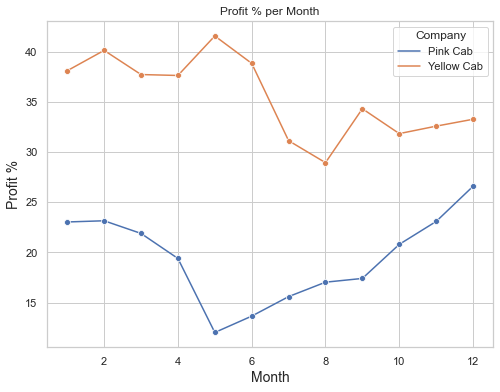

In [110]:
plt.figure(figsize=(8,6))
sns.lineplot(x='Month', y='%Profit', hue="Company", data=d, marker='o')
plt.xlabel("Month", size=14)
plt.ylabel("Profit %", size=14)
plt.title("Profit % per Month")

Text(0.5, 1.0, 'Prices per Month')

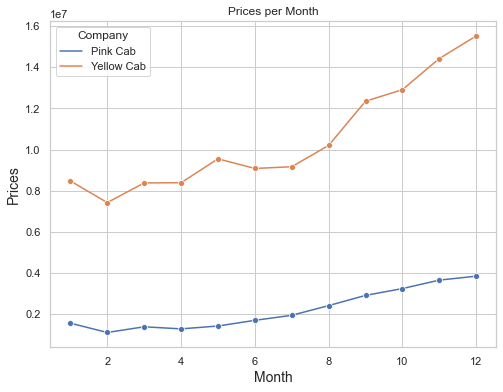

In [111]:
plt.figure(figsize=(8,6))
sns.lineplot(x='Month', y='Price', hue="Company", data=d, marker='o')
plt.xlabel("Month", size=14)
plt.ylabel("Prices", size=14)
plt.title('Prices per Month')

In [112]:
df_yellow_profit = YellowCab_data.Profit.resample('m').sum().to_frame('Profit')

In [113]:
mean_y = round(df_yellow_profit.Profit.mean(),2) 
std_y = round(df_yellow_profit.Profit.std(),2)

In [114]:
print('The percentage of the Profit deviation for the Yellow Cab company is', round((std_y / mean_y)*100,2),'%')

The percentage of the Profit deviation for the Yellow Cab company is 23.08 %


In [115]:
df_pink_profit = PinkCab_data.Profit.resample('m').sum().to_frame('Profit')

In [116]:
mean_p = round(df_pink_profit.Profit.mean(),2) 
std_p = round(df_pink_profit.Profit.std(),2)

In [117]:
print('The percentage of the Profit deviation for the Pink Cab company is', round((std_p / mean_p)*100,2),'%')

The percentage of the Profit deviation for the Pink Cab company is 61.22 %


In [ ]:
# YellowCab Company's earnings are more stable, with fluctuations of 23.07%, while those of the PinkCab Company's vary in the order of 61.09%


In [ ]:
# Analysis by city

In [118]:
df_city_users = master_data_TS.groupby('City').Users.count()
df_city_users

City
ATLANTA GA         7557
AUSTIN TX          4896
BOSTON MA         29692
CHICAGO IL        56625
DALLAS TX          7017
DENVER CO          3825
LOS ANGELES CA    48033
MIAMI FL           6454
NASHVILLE TN       3010
NEW YORK NY       99885
ORANGE COUNTY      3982
PHOENIX AZ         2064
PITTSBURGH PA      1313
SACRAMENTO CA      2367
SAN DIEGO CA      20488
SEATTLE WA         7997
SILICON VALLEY     8519
TUCSON AZ          1931
WASHINGTON DC     43737
Name: Users, dtype: int64

In [119]:
df_city_y = YellowCab_data.groupby('City').Users.count()
df_city_y

City
ATLANTA GA         5795
AUSTIN TX          3028
BOSTON MA         24506
CHICAGO IL        47264
DALLAS TX          5637
DENVER CO          2431
LOS ANGELES CA    28168
MIAMI FL           4452
NASHVILLE TN       1169
NEW YORK NY       85918
ORANGE COUNTY      2469
PHOENIX AZ         1200
PITTSBURGH PA       631
SACRAMENTO CA      1033
SAN DIEGO CA       9816
SEATTLE WA         5265
SILICON VALLEY     4722
TUCSON AZ          1132
WASHINGTON DC     40045
Name: Users, dtype: int64

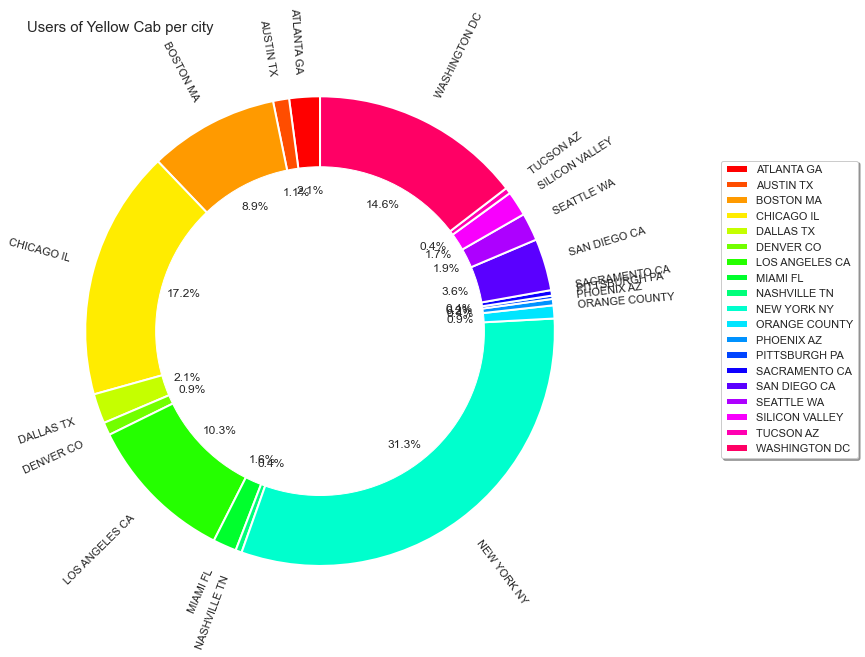

In [120]:
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.70, color='white')

# Custom wedges
fig, ax = plt.subplots(figsize=(9,9))

# set a theme for colors
theme = plt.get_cmap('hsv')
ax.set_prop_cycle("color", [theme(1. * i / len(df_city_y.values))
                             for i in range(len(df_city_y.values))])

ax.pie(df_city_y.values, 
       labels=df_city_y.index, 
       wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' }, 
       startangle=90, 
       autopct='%1.1f%%', 
       rotatelabels=True)

p = plt.gcf()
p.gca().add_artist(my_circle)

# set the legend 
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.30, 0.8), shadow=True, ncol=1)

plt.title("Users of Yellow Cab per city", fontsize=15, loc='left')
plt.tight_layout()
plt.show()

In [121]:
df_city_p = PinkCab_data.groupby('City').Users.count()
df_city_p

City
ATLANTA GA         1762
AUSTIN TX          1868
BOSTON MA          5186
CHICAGO IL         9361
DALLAS TX          1380
DENVER CO          1394
LOS ANGELES CA    19865
MIAMI FL           2002
NASHVILLE TN       1841
NEW YORK NY       13967
ORANGE COUNTY      1513
PHOENIX AZ          864
PITTSBURGH PA       682
SACRAMENTO CA      1334
SAN DIEGO CA      10672
SEATTLE WA         2732
SILICON VALLEY     3797
TUCSON AZ           799
WASHINGTON DC      3692
Name: Users, dtype: int64

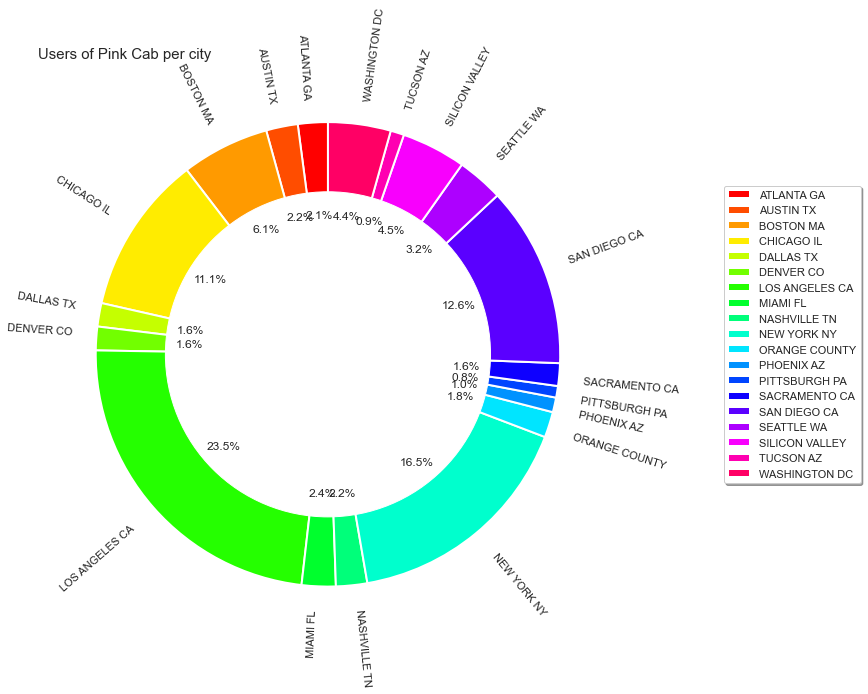

In [122]:
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Custom wedges
fig, ax = plt.subplots(figsize=(9,9))

# set a theme for colors
theme = plt.get_cmap('hsv')
ax.set_prop_cycle("color", [theme(1. * i / len(df_city_p.values))
                             for i in range(len(df_city_p.values))])

ax.pie(df_city_p.values, 
       labels=df_city_p.index, 
       wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' }, 
       startangle=90, 
       autopct='%1.1f%%', 
       rotatelabels=True)

p = plt.gcf()
p.gca().add_artist(my_circle)

# set the legend
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.30, 0.8), shadow=True, ncol=1)

plt.title('Users of Pink Cab per city', fontsize=15, loc='left')
plt.tight_layout()
plt.show()

In [ ]:
# Transaction for Yellow Cab is highest in New York City which has the highest Cab Users of 28%

In [ ]:
# Transaction for Pink Cab is highest in Los Angeles City

In [123]:
df_city_p = PinkCab_data.groupby('City').Users.count()
df_city_p.values.max()

19865

In [124]:
pp = df_city_p.to_frame()
ppp = pp.reset_index()
ppp

,City,Users
0,ATLANTA GA,1762
1,AUSTIN TX,1868
2,BOSTON MA,5186
3,CHICAGO IL,9361
4,DALLAS TX,1380
5,DENVER CO,1394
6,LOS ANGELES CA,19865
7,MIAMI FL,2002
8,NASHVILLE TN,1841
9,NEW YORK NY,13967


Text(0.5, 1.0, 'Yellow Cab Profits over City')

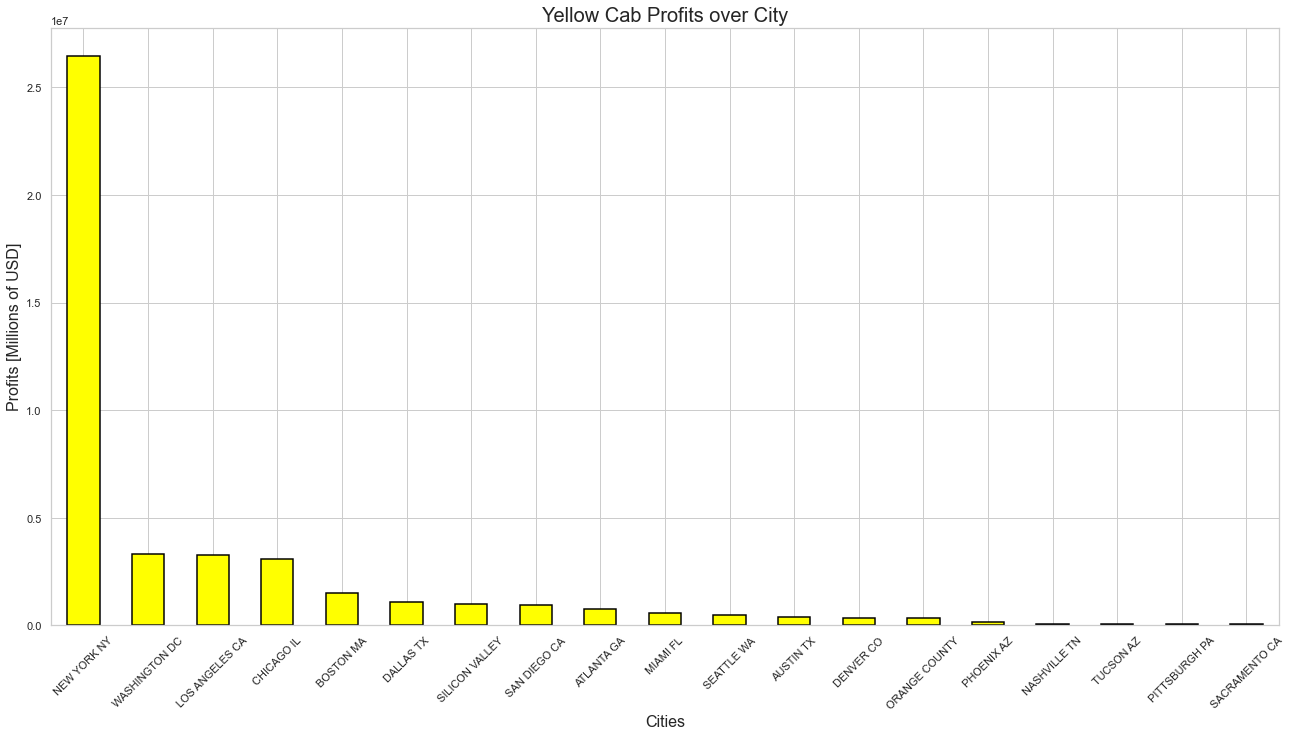

In [125]:
yellow_profit_city = YellowCab_data.groupby('City').Profit.sum()
yellow_profit_city = pd.DataFrame(yellow_profit_city)
yellow_profit_city = yellow_profit_city.sort_values(by='Profit', ascending= False )


plt.figure(figsize=(22,11))
fig= yellow_profit_city.Profit.plot.bar(color = 'yellow',edgecolor='black',linewidth=1.5)
plt.xticks(rotation=45)

plt.ylabel('Profits [Millions of USD]', fontsize=16)
plt.xlabel('Cities', fontsize=16)
plt.title('Yellow Cab Profits over City',fontsize=20)

Text(0.5, 1.0, 'Pink Cab Profits over City')

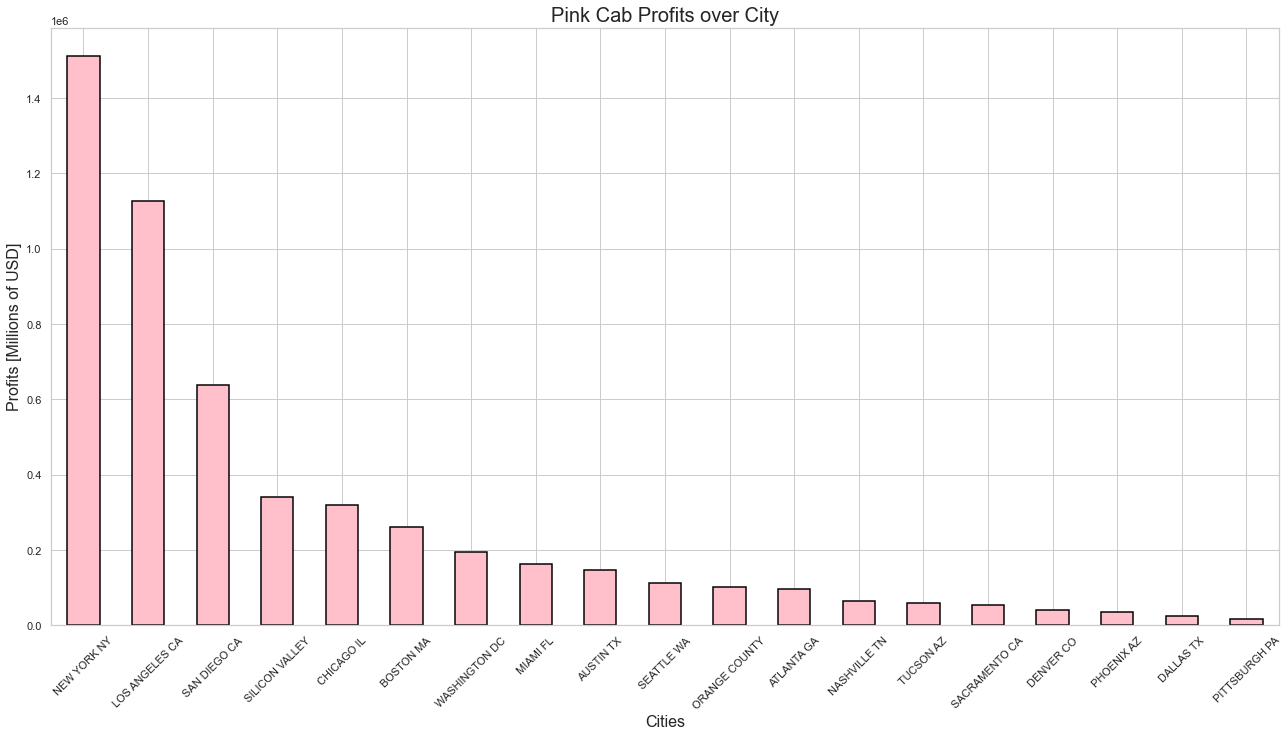

In [126]:
pink_profit_city = PinkCab_data.groupby('City').Profit.sum()
pink_profit_city = pd.DataFrame(pink_profit_city)
pink_profit_city = pink_profit_city.sort_values(by='Profit', ascending= False )


plt.figure(figsize=(22,11))
fig= pink_profit_city.Profit.plot.bar(color = 'pink',edgecolor='black',linewidth=1.5)
plt.xticks(rotation=45)

plt.ylabel('Profits [Millions of USD]', fontsize=16)
plt.xlabel('Cities', fontsize=16)
plt.title('Pink Cab Profits over City',fontsize=20)

In [127]:
df_gender_y = YellowCab_data.groupby('Gender').Price_Charged.mean()
df_gender_y

Gender
Female    454.571538
Male      460.821326
Name: Price_Charged, dtype: float64

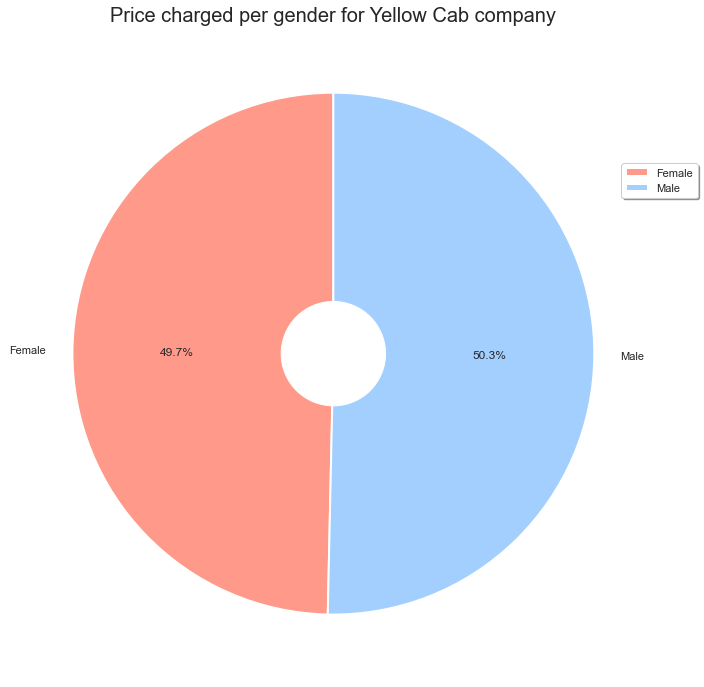

In [128]:
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.2, color='white')

# Custom wedges
fig, ax = plt.subplots(figsize=(20,20))

ax.pie(df_gender_y.values, 
       labels=df_gender_y.index, 
       wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' }, 
       startangle=90, 
       autopct='%1.1f%%',
       colors=["#ff9a8a","#a2cffe"])

p = plt.gcf()
p.gca().add_artist(my_circle)

chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.0, 0.8), shadow=True, ncol=1)

plt.title('Price charged per gender for Yellow Cab company', fontsize=20)
plt.show()

In [129]:
df_gender_p = PinkCab_data.groupby('Gender').Price_Charged.mean()
df_gender_p

Gender
Female    310.624823
Male      310.940547
Name: Price_Charged, dtype: float64

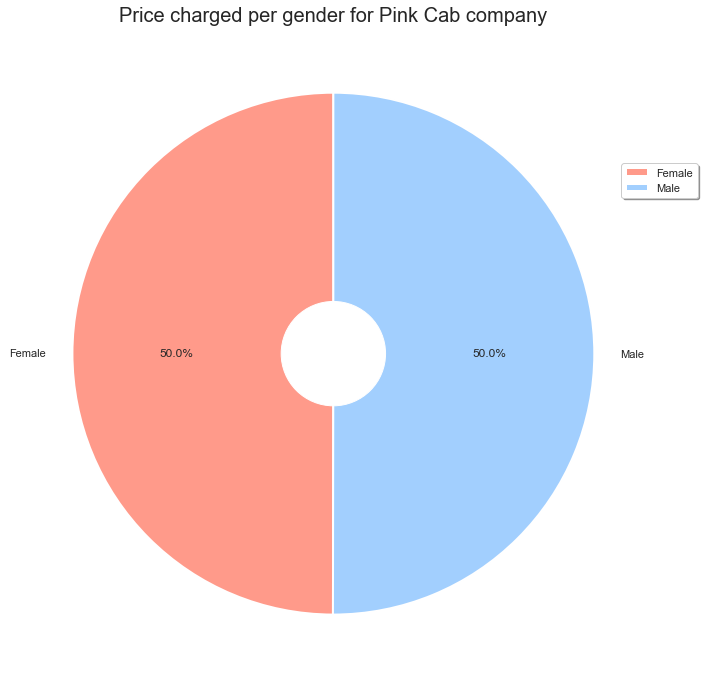

In [130]:
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.2, color='white')

# Custom wedges
fig, ax = plt.subplots(figsize=(20,20))

ax.pie(df_gender_p.values, 
       labels=df_gender_p.index, 
       wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' }, 
       startangle=90, 
       autopct='%1.1f%%',
       colors=["#ff9a8a","#a2cffe"])

p = plt.gcf()
p.gca().add_artist(my_circle)

chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.0, 0.8), shadow=True, ncol=1)

plt.title('Price charged per gender for Pink Cab company', fontsize=20)
plt.show()

In [ ]:
# Yellow Cab charge less from Female Customers whereas Pink Cab charges same for both Male and Female Customers.

In [131]:
gender_cab=master_data_TS.groupby(['Company','Gender']).Customer_ID.nunique()
gender_cab

Company     Gender
Pink Cab    Female    14819
            Male      17511
Yellow Cab  Female    18394
            Male      21502
Name: Customer_ID, dtype: int64

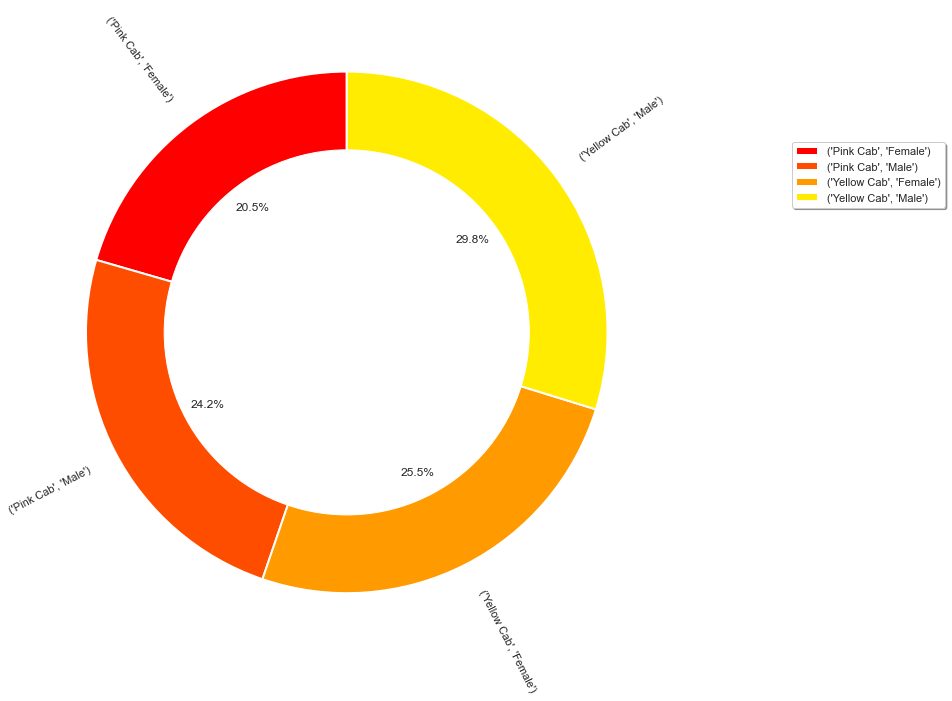

In [132]:
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Custom wedges
fig, ax = plt.subplots(figsize=(10,10))

# set a theme for colors
theme = plt.get_cmap('hsv')
ax.set_prop_cycle("color", [theme(1. * i / len(df_city_p.values))
                             for i in range(len(df_city_p.values))])

ax.pie(gender_cab.values, 
       labels=gender_cab.index, 
       wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' }, 
       startangle=90, 
       autopct='%1.1f%%', 
       rotatelabels=True)

p = plt.gcf()
p.gca().add_artist(my_circle)

# set the legend
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.30, 0.8), shadow=True, ncol=1)

plt.title('')
plt.tight_layout()
plt.show()

In [ ]:
# Female Customers in Yellow Cab is higher compared to female customers in Pink cab.

In [ ]:
# Hypothesis Testing:

In [ ]:
#Hypothesis 1:

#H0 : There is no difference regarding Payment_Mode in both cab companies.

#H1 : There is difference regarding Payment_Mode in both cab companies.

In [135]:
#Pink Cab

data_1 = master_data_TS[(master_data_TS.Payment_Mode=='Cash')&(master_data_TS.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
data_2 = master_data_TS[(master_data_TS.Payment_Mode=='Card')&(master_data_TS.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()

_, p_value = stats.ttest_ind(data_1.values,
                             data_2.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference in payment mode for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference in payment mode for Pink Cab')

P value is  0.7900465828793288
We accept null hypothesis (H0) that there is no difference in payment mode for Pink Cab


In [ ]:
# There is no difference in payment mode for both cab companies.

In [ ]:
# Hypothesis 2:

#H0 : There is no difference regarding Gender in both cab companies.

#H1 : There is difference regarding Gender in both cab companies.


In [136]:
#Pink Cab

data_1 = master_data_TS[(master_data_TS.Gender=='Male')&(master_data_TS.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
data_2 = master_data_TS[(master_data_TS.Gender=='Female')&(master_data_TS.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()

_, p_value = stats.ttest_ind(data_1.values,
                             data_2.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference for Pink Cab')

P value is  0.11515305900425798
We accept null hypothesis (H0) that there is no difference for Pink Cab


In [137]:
#Yellow Cab

data_1 = master_data_TS[(master_data_TS.Gender=='Male')&(master_data_TS.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
data_2 = master_data_TS[(master_data_TS.Gender=='Female')&(master_data_TS.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()

_, p_value = stats.ttest_ind(data_1.values,
                             data_2.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference for Yellow Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference for Yellow Cab')

P value is  6.060473042494144e-25
We accept alternative hypothesis (H1) that there is a difference for Yellow Cab


In [ ]:
# There is a difference regarding Gender only for Yellow Cab company.

In [ ]:
# Hypothesis 3:

# H0 : There is no difference regarding Age in both cab companies.

# H1 : There is difference regarding Age in both cab companies.


In [138]:
master_data_TS.Age.unique()

array([28, 27, 53, 23, 33, 25, 32, 39, 35, 24, 61, 46, 40, 20, 19, 62, 36,
       50, 65, 59, 34, 18, 38, 58, 47, 42, 26, 37, 56, 22, 21, 29, 30, 63,
       48, 55, 51, 60, 31, 41, 52, 45, 64, 44, 43, 54, 49, 57],
      dtype=int64)

In [139]:
#Pink Cab

data_1 = master_data_TS[(master_data_TS.Age <= 60)&(master_data_TS.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
data_2 = master_data_TS[(master_data_TS.Age > 60)&(master_data_TS.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()

_, p_value = stats.ttest_ind(data_1.values,
                             data_2.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding age for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding age for Pink Cab')

P value is  0.18796448671958466
We accept null hypothesis (H0) that there is no difference regarding age for Pink Cab


In [140]:
#Yellow Cab

data_1 = master_data_TS[(master_data_TS.Age <= 60)&(master_data_TS.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
data_2 = master_data_TS[(master_data_TS.Age > 60)&(master_data_TS.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()

_, p_value = stats.ttest_ind(data_1.values,
                             data_2.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding age for Yellow Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding age for Yellow Cab')

P value is  2.8426722804525463e-07
We accept alternative hypothesis (H1) that there is a difference regarding age for Yellow Cab


In [ ]:
# Looks like Yellow Cab company offers discounts for their customers who are older than 60 years old.
